### Exercise 02.1
Montecarlo methods can be exploited to compute integrals. Given an integral in the form
$$I = \int_\Omega g(x)p(x) dx $$
with $p(x)$ a probability distribution, the computation consists simply in averaging the evaluations of $g(x)$ at n different points $x_{i}$ randomly sampled with $p(x)$:
$$I = \frac{1}{n}\sum_{i=1}^n g(x_{i}) $$.

In order to evaluate the integral 
$$I = \int_0^1 \frac{\pi}{2}\cos(\pi x/2) dx = 1$$
we start by considering $p(x)$ as a uniform distribution on [0,1]. Figure 1 shows the progressive average of N=100 integral estimations. Each estimation is computed with n=1000 points and its error is a random variable whose width is characterized by $$error=\sigma_{U}/\sqrt{1000}$$ that holds, through CLT, because the random generator does not create a significant correlation between consecutive generated values, and where

$$ \sigma_{U}^2 = \int_0^1 {(\frac{\pi}{2}\cos(\pi x/2))}^2 dx - 1 \simeq 0.23$$


Therefore, according to the CLT and assuming that the integral estimations are i.i.d. with variance equal to ${error}^2$, we expect that the uncertainty on the progressive average tends to $\sigma = error / \sqrt{N}$. 






Through importance sampling the uncertainty on the estimation can be reduced. In this case, we need to choose as $p(x)$ a function as similar as possible to the integrand and that admits an analytic inverse to the cumulative function. $p(x)=2-2x$ is chosen and random points are sampled with the inverse transform sampling method.

The function to evaluate is now 
$$g(x) = \frac{(\frac{\pi}{2}\cos(\pi x/2))}{p(x)} = \frac{(\frac{\pi}{2}\cos(\pi x/2))}{2-2x}$$

Again, we use n=1000 points for each one of N=100 integral estimations. The expected uncertainty on the progressive average is still $\sigma = error / \sqrt{N}$, with 
$$error=\sigma_{IS}/\sqrt{1000}$$ and

$$ \sigma_{IS}^2 = \int_0^1{g(x)^2} dx = \int_0^1 {\frac{(\frac{\pi}{2}\cos(\pi x/2))^2}{2-2x}} dx - 1 \simeq 0.017$$



By observing the plots below we verify that Montecarlo methods allow us to compute integrals. Compared to standard quadrature, it is possible to show that Montecarlo is more efficient at higher dimensions. However, the efficiency of the Montecarlo itself can be improved through some techniques, such as importance sampling, that significantly reduce the errors. 




**Brief description of figure 1:**

Figures 1a and 1b show the progressive average of the integral with uniform and importance sampling, respectively. The result is compatible within uncertaintes with the value computed analytically.
Figure 1c illustrates the comparison between expected and computed uncertaintes for both sampling methods. It is worth remarking that the calculation done above for the uncertaintes is only true without correlations between the random generated values.

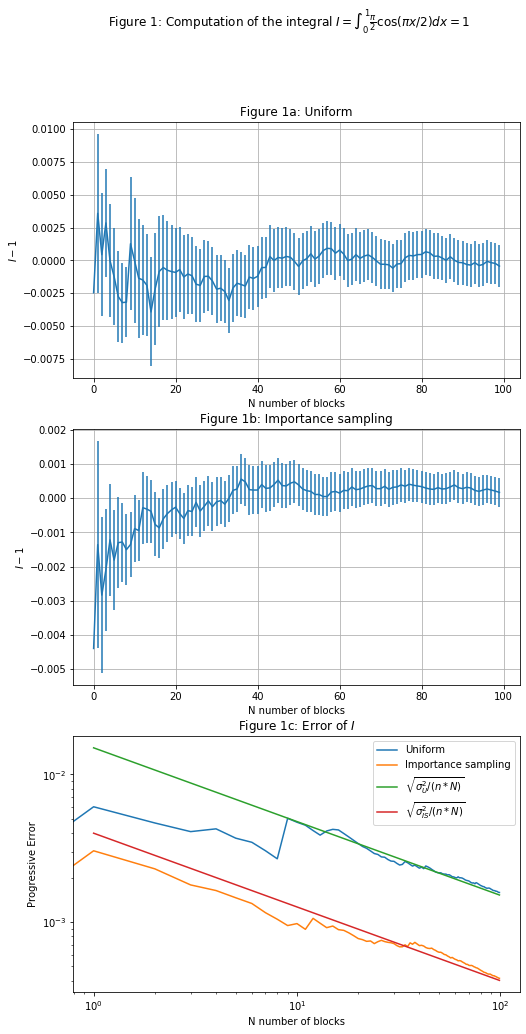

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np


fig, ax = plt.subplots(3 , 1, figsize=(8,16))
plt.suptitle(r'Figure 1: Computation of the integral $I = \int_0^1 \frac{\pi}{2}\cos(\pi x/2) dx = 1$')
title=["Figure 1a: Uniform", "Figure 1b: Importance sampling"]
error_arr=[]

for i in range(2):
    prog_av, error = np.loadtxt(rf'ex_02.1/ex_02.1.{i+1}.dat', usecols=(0,1), delimiter=' ', unpack='true')
    error_arr.append(error)
    x = np.arange(prog_av.size)
    ax[i].errorbar(x,prog_av-1,yerr=error)
    ax[i].set_ylabel('$I-1$')
    ax[i].set_xlabel('N number of blocks')
    ax[i].grid(True)
    ax[i].set_title(title[i])
    
    ax[2].plot(x,error_arr[i])
    

ax[2].set_yscale('log')
ax[2].set_xscale('log')
ax[2].set_title(r'Figure 1c: Error of $I$')
ax[2].set_xlabel('N number of blocks')
ax[2].set_ylabel(r'Progressive Error')    
z=np.arange(1,100)
ax[2].plot(z,np.sqrt(0.00023/z))
ax[2].plot(z,np.sqrt(0.000016/z))
ax[2].legend(['Uniform','Importance sampling', r'$\sqrt{\sigma_{U}^2/(n * N)}$', r'$\sqrt{\sigma_{IS}^2/(n * N)}$' ])
    


### Exercise 02.2

Two different 3d random walks are simulated. In the first RW the walker is allowed to take steps of fixed lenght $a$, forward or backward, but only in direction x, y or z. The same is true for the second RW, but instead of discrete directions, the walker can now move in any possible direction ( $\theta \in [0,\pi]$ and $\phi \in [0,2\pi]$ ). In both cases we can observe the same behaviour.

Two significant observations can be made:
<ul>
    <li>First of all, the mean square displacement grows in a typical diffusive way. In fact, by fitting the mean square displacement with a power law $AN^B$, with N number of steps, we see that the best parameters are the step lenght $a$ as coefficient and $0.5$ as exponent. Therefore we have a $1/2$ power law, typical of a diffusive behaviour, with diffusive constant $D=a^2/(2\tau)$ ($\tau$ time needed for a single step);</li>
    <li>In a less rigorous manner, we can deduce a diffusive behaviour also from the uncertainty of the mean square displacement. As we can observe from the plots, with increasing number of steps, the error gets larger and this is showing that the possible paths of the walker get more spread with growing number of steps.</li>
        </ul>

In [2]:
from scipy.optimize import curve_fit

def power_law(x, a, b):
    return a*np.power(x, b)

parameter A: 3.999591760998259 +- 0.005547668352889363
parameter B: 0.49956373476173815 +- 0.00033501543585573196


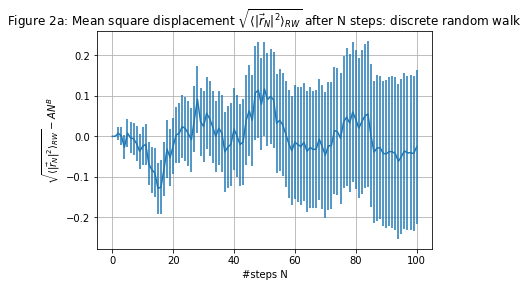

In [5]:
MSD_N, error_N = np.loadtxt('ex_02.2/discrete_rw.dat', usecols=(0,1), delimiter=' ', unpack='true')
x=np.arange(MSD_N.size)
let=['A','B']

# fit the data
pars, cov = curve_fit(f=power_law, xdata=x, ydata=MSD_N, p0=[0, 0], bounds=(-np.inf, np.inf))# Get the standard deviations of the parameters (square roots of the # diagonal of the covariance)
std = np.sqrt(np.diag(cov))# Calculate the residuals

for i in range(2):
    print(f'parameter {let[i]}: {pars[i]} +- {std[i]}')





plt.errorbar(x,MSD_N-pars[0]*x**pars[1],yerr=error_N)
plt.xlabel('#steps N')
plt.ylabel(r'$\sqrt{\langle |\vec{r}_N|^2 \rangle_{RW}} - A N^B$')
plt.title(r'Figure 2a: Mean square displacement $\sqrt{\langle |\vec{r}_N|^2 \rangle_{RW}}$ after N steps: discrete random walk')
plt.grid(True)
plt.show()


parameter A: 3.956170239862104 +- 0.0034874695397319943
parameter B: 0.5019948820010398 +- 0.0002128602150624469


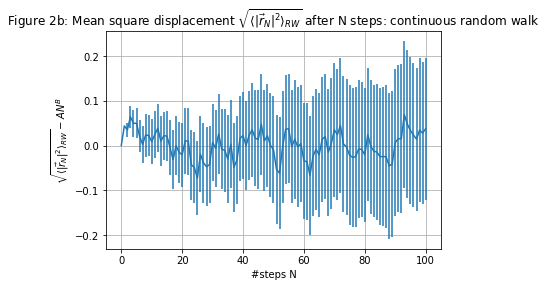

In [6]:
MSDC_N, errorC_N = np.loadtxt('ex_02.2/continuous_rw.dat', usecols=(0,1), delimiter=' ', unpack='true')
x=np.arange(MSDC_N.size)

let=['A','B']

# fit the data
pars, cov = curve_fit(f=power_law, xdata=x, ydata=MSDC_N, p0=[0, 0], bounds=(-np.inf, np.inf))# Get the standard deviations of the parameters (square roots of the # diagonal of the covariance)
std = np.sqrt(np.diag(cov))# Calculate the residuals

for i in range(2):
    print(f'parameter {let[i]}: {pars[i]} +- {std[i]}')


plt.errorbar(x,MSDC_N-pars[0]*x**pars[1],yerr=errorC_N)
plt.xlabel('#steps N')
plt.ylabel(r'$\sqrt{\langle |\vec{r}_N|^2 \rangle_{RW}} - A N^B$')
plt.title(r'Figure 2b: Mean square displacement $\sqrt{\langle |\vec{r}_N|^2 \rangle_{RW}}$ after N steps: continuous random walk')
plt.grid(True)
plt.show()
